## Imports

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## STEP 1

In [6]:
image = cv2.imread("lena.jpg")

## STEP 2

In [7]:
mean = 0
std_dev = 0.1
gaussian_noise = np.random.normal(mean, std_dev, image.shape)
noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)

## STEP 3

In [8]:
blue, green, red = cv2.split(image)
hist_blue, bins_blue = np.histogram(blue.flatten(), 256, [0, 256])
hist_green, bins_green = np.histogram(green.flatten(), 256, [0, 256])
hist_red, bins_red = np.histogram(red.flatten(), 256, [0, 256])

## STEP 4

In [9]:
blue_eq = cv2.equalizeHist(blue)
green_eq = cv2.equalizeHist(green)
red_eq = cv2.equalizeHist(red)

## STEP 5

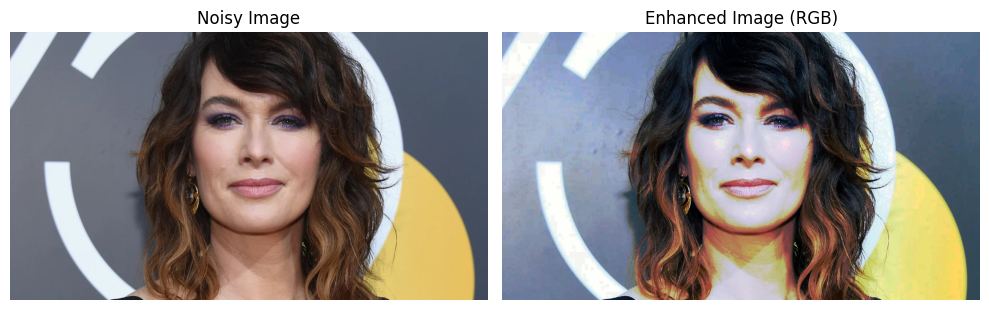

In [10]:
enhanced_image_rgb = cv2.merge((blue_eq, green_eq, red_eq))
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(enhanced_image_rgb, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image (RGB)")
plt.axis("off")

plt.tight_layout()
plt.show()

## STEP 6

In [11]:
hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue, saturation, intensity = cv2.split(hsi_image)
hist_intensity, bins_intensity = np.histogram(intensity.flatten(), 256, [0, 256])
intensity_eq = cv2.equalizeHist(intensity)
hsi_eq_image = cv2.merge((hue, saturation, intensity_eq))

## STEP 7

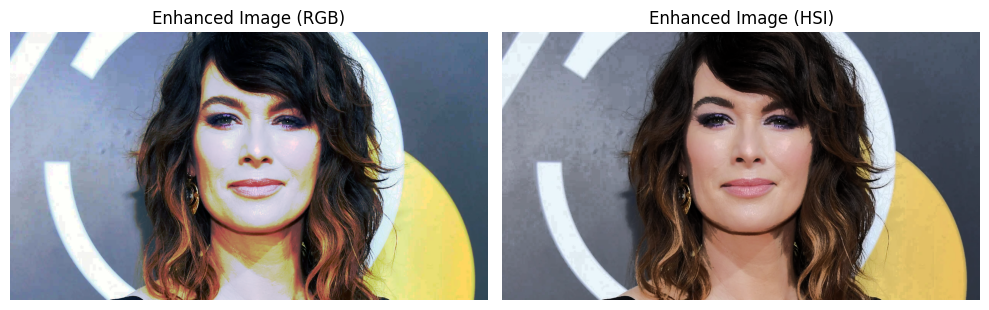

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(cv2.cvtColor(enhanced_image_rgb, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image (RGB)")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(hsi_eq_image, cv2.COLOR_HSV2RGB))
plt.title("Enhanced Image (HSI)")
plt.axis("off")

plt.tight_layout()
plt.show()

## STEP 8

In [13]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## STEP 9

In [14]:
jet_colormap = plt.get_cmap("jet")
pseudo_colored_image = jet_colormap(gray_image)

## STEP 10

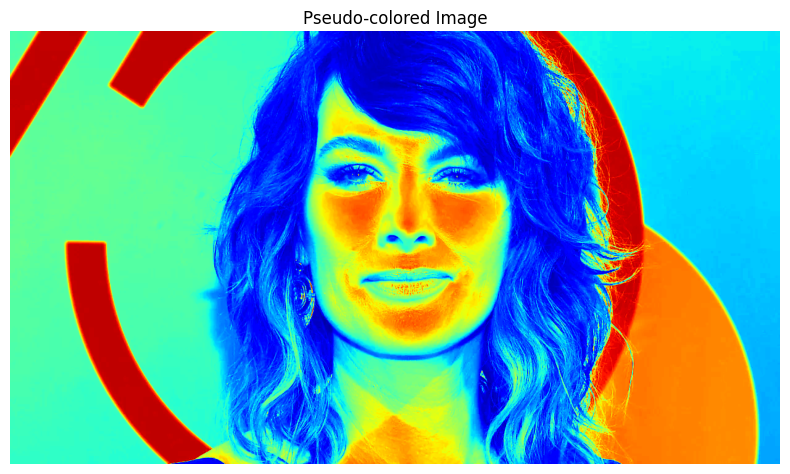

In [15]:
num_intervals = 6
intensity_levels = np.linspace(0, 255, num_intervals + 1, dtype=np.uint8)
intensity_sliced_image = np.zeros_like(pseudo_colored_image)
for i in range(num_intervals):
    lower_bound, upper_bound = intensity_levels[i], intensity_levels[i + 1]
    mask = np.where((gray_image >= lower_bound) & (gray_image <= upper_bound))
    intensity_sliced_image[mask] = pseudo_colored_image[mask]

# Display the final pseudo-colored image
plt.figure(figsize=(8, 6))
plt.imshow(intensity_sliced_image)
plt.title("Pseudo-colored Image")
plt.axis("off")

plt.tight_layout()
plt.show()